In [1]:
import sys
!{sys.executable} -m pip install pymongo
!{sys.executable} -m pip install pyyaml
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install moment
!{sys.executable} -m pip install statsmodels
import os
print(os.getcwd())



/Users/drewgregory/JupyterNotebooks/habitlab-data-analysis


In [2]:
# Get Mongo database
from yaml import load
from pymongo import MongoClient
from getsecret import getsecret

client = MongoClient(getsecret("MONGODB_URI"))
db = client[getsecret("DB_NAME")]

In [3]:
# Get all synced accounts and their respective users.
import urllib.request as req
import json
accounts = json.loads(req.urlopen("http://localhost:5000/synced_emails").read().decode("utf-8"))

In [4]:
# Organize sessions by goal and frequent vs. infrequent for Android
goals = {}
for account in accounts:
    for user in account["android"]:
        for session in db[user + "_sessions"].find({"enabled": True}):
            domain = session["domain"]
            if domain not in goals:
                goals[domain] = {"freq":[], "infreq":[]}
            if session["frequent"]:
                goals[domain]["freq"].append(session)
            else:
                goals[domain]["infreq"].append(session)

In [5]:
import matplotlib.pyplot as pyplot
from statistics import mean, median
from scipy.stats import sem, norm 
# Now show graphs for each domain to compare frequent sessions vs infrequent sessions.
domain_stats = []
for domain in goals:
    if len(goals[domain]["freq"]) > 0 and len(goals[domain]["infreq"]) > 0:
        freq_durations = [session["duration"] for session in goals[domain]["freq"]]
        freq_avg = mean(freq_durations)
        freq_err = sem(freq_durations)
        infreq_durations = [session["duration"] for session in goals[domain]["infreq"]] 
        infreq_avg = mean(infreq_durations)
        infreq_err = sem(infreq_durations)
        domain_stats.append({"domain": domain, "freq": freq_avg, 
                             "infreq": infreq_avg, "freq_pts":len(goals[domain]["freq"]),
                            "infreq_pts":len(goals[domain]["infreq"]), "freq_err": freq_err,
                            "infreq_err": infreq_err})

        domain_stats = sorted(domain_stats, key=lambda stat: int(stat["freq_pts"] + stat["infreq_pts"]))
counter = 0
for stat in domain_stats:
    print(int(stat["freq_pts"] + stat["infreq_pts"]))
    print(stat['domain'] + " with " + str(stat["freq_pts"]) + " freq points " + " and " + str(stat["infreq_pts"]) + " infreq pts")
    print("freq avg: " + str(stat["freq"]))
    print("infreq avg: " + str(stat["infreq"]))
    print("")
    # If there is a statistically significant difference (95% conf intervals don't overlap), we will show the graph.
    if stat["freq"] - 1.64 * stat["freq_err"] > stat["infreq"] + 1.64 * stat["infreq_err"] or stat["infreq"] -  1.64 * stat["infreq_err"] > stat["freq"] + 1.64 * stat["freq_err"]:
        print("SIGNIFICANT")
        pyplot.figure(counter)
        counter += 1
        pyplot.title(stat["domain"])
        pyplot.ylabel('Average session duration')
        pyplot.bar(["sessions with frequent setting", "sessions with infrequent setting"], [stat["freq"], stat["infreq"]] , .8, yerr=[1.64 * stat["freq_err"], 1.64 * stat["infreq_err"]])
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2
com.clowngames.shootersio with 1 freq points  and 1 infreq pts
freq avg: 136
infreq avg: 107

2
com.ted.android with 1 freq points  and 1 infreq pts
freq avg: 5
infreq avg: 24

2
com.google.android.videos with 1 freq points  and 1 infreq pts
freq avg: 10
infreq avg: 170

2
com.etsy.android with 1 freq points  and 1 infreq pts
freq avg: 7
infreq avg: 20

3
cc.forestapp with 1 freq points  and 2 infreq pts
freq avg: 3
infreq avg: 1

4
org.ebookdroid with 3 freq points  and 1 infreq pts
freq avg: 68.66666666666667
infreq avg: 426

4
com.crowdstar.covetHome with 1 freq points  and 3 infreq pts
freq avg: 54
infreq avg: 63

4
com.magoosh.gre.quiz.vocabulary with 3 freq points  and 1 infreq pts
freq avg: 32
infreq avg: 1

4
com.hellochinese with 1 freq points  and 3 infreq pts
freq avg: 24
infreq avg: 5.333333333333333

4
ch.alpsoft.qoqa.ui with 2 freq points  and 2 infreq pts
freq avg: 23.5
infreq avg: 13.5

4
com.uniqlo.ca.catalogue with 1 freq points  and 3 infreq pts
freq avg: 474
infre

52
com.google.android.dialer with 17 freq points  and 35 infreq pts
freq avg: 202.35294117647058
infreq avg: 78.57142857142857

52
mindware.minegamespro with 34 freq points  and 18 infreq pts
freq avg: 157.61764705882354
infreq avg: 152.72222222222223

53
com.zhiliaoapp.musically with 5 freq points  and 48 infreq pts
freq avg: 579.2
infreq avg: 72.91666666666667

SIGNIFICANT
54
mobi.beyondpod with 32 freq points  and 22 infreq pts
freq avg: 16.0625
infreq avg: 50.04545454545455

56
com.chrome.dev with 9 freq points  and 47 infreq pts
freq avg: 36.77777777777778
infreq avg: 71.8936170212766

59
de.gmx.mobile.android.mail with 35 freq points  and 24 infreq pts
freq avg: 16.285714285714285
infreq avg: 16.333333333333332

61
com.miniclip.eightballpool with 5 freq points  and 56 infreq pts
freq avg: 151.8
infreq avg: 58.107142857142854

61
com.quora.android with 40 freq points  and 21 infreq pts
freq avg: 101.95
infreq avg: 71.19047619047619

64
com.ninefolders.hd3 with 36 freq points  and 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


492
mong.moptt with 246 freq points  and 246 infreq pts
freq avg: 134.6788617886179
infreq avg: 139.96341463414635

671
jp.r246.twicca with 170 freq points  and 501 infreq pts
freq avg: 82.42941176470588
infreq avg: 83.91816367265469

695
com.samsung.android.messaging with 10 freq points  and 685 infreq pts
freq avg: 69
infreq avg: 26.906569343065694

751
com.onelouder.baconreader with 331 freq points  and 420 infreq pts
freq avg: 39.616314199395774
infreq avg: 70.58571428571429

SIGNIFICANT
827
com.andrewshu.android.reddit with 691 freq points  and 136 infreq pts
freq avg: 128.65123010130247
infreq avg: 274.7132352941176

SIGNIFICANT
837
com.devhd.feedly with 418 freq points  and 419 infreq pts
freq avg: 54.9688995215311
infreq avg: 61.10978520286396

838
com.plurk.android with 382 freq points  and 456 infreq pts
freq avg: 52.21465968586387
infreq avg: 81.68201754385964

SIGNIFICANT
926
org.mozilla.firefox with 538 freq points  and 388 infreq pts
freq avg: 87.83828996282529
infreq avg

In [6]:
improvement_stats = {"freq": [], "infreq": []}
for account in accounts:
    for user in account["android"]:
        # We now want to see if they have goals that have alternated from freq to infreq.
        goals={}
        for session in db[user + "_sessions"].find({"enabled": True}):
            domain = session["domain"]
            if domain not in goals:
                goals[domain] = {"freq_duration":0, "freq_count": 0, "infreq_duration":0, "infreq_count":0}
            if session["frequent"]:
                goals[domain]["freq_duration"] += session["duration"]
                goals[domain]["freq_count"] += 1
            else:
                goals[domain]["infreq_duration"] += session["duration"]
                goals[domain]["infreq_count"] += 1
        # Compute averages
        for domain in goals:
            print(str(goals[domain]["freq_count"]) + " " + str(goals[domain]["infreq_count"]) )
            if goals[domain]["freq_count"] > 20 and goals[domain]["infreq_count"] > 20:
                freq_avg = goals[domain]["freq_duration"]/goals[domain]["freq_count"]
                infreq_avg = goals[domain]["infreq_duration"]/goals[domain]["infreq_count"]
                # print("for " + user +": " + str(freq_avg) + " " + str(infreq_avg))
                improvement_stats["freq"].append(freq_avg)
                improvement_stats["infreq"].append(infreq_avg)


0 86
0 71
1 0
0 3
4 0
0 5
0 2
18 33
59 24
7 17
6 3
4 0
0 8
19 246
21 255
189 46
60 797
7 2
2 0
244 90
177 359
143 62
269 166
0 44
0 50
73 30
1 17
0 6
0 18
8 0
164 0
30 0
0 2
0 11
7 0
1 0
0 2
3 0
0 1
8 0
2 0
0 2
3 19
536 1
0 87
0 24
5 56
85 5
2 173
1 135
57 8
7 3
0 10
11 0
6 0
0 3
0 1
331 331
501 491
858 153
0 898
408 238
49 70
1 3
0 1
0 54
7 28
7 68
22 1
9 0
0 3
7 16
4 0
0 5
75 0
114 0
108 0
45 0
0 19
0 3
0 16
6 124
0 14
48 2
8 0
0 67
1 22
2 61
8 0
3 25
48 0
2 3
1 4
0 40
77 156
21 39
20 1
3 13
0 2
0 3
2 3
56 0
1 1
12 0
1 8
3 1
9 3
0 28
5 17
0 5
0 3
0 2
0 1
0 1
4 0
0 4
0 2
0 3
1 0
3 0
7 0
0 26
22 0
0 6
0 1
0 5
2 0
1 0
13 0
18 0
0 5
0 4
1 0
0 1
0 1
7 0
0 35
18 0
0 4
0 3
2 0
0 4
0 14
20 0
4 0
6 0
1 0
0 11
8 0
1 0
0 1
0 2
0 2
0 4
0 4
16 0
0 1
0 1
131 63
1 0
9 7
31 25
12 15
20 158
404 512
7 583
46 28
45 36
11 0
164 220
1 0
3 1
15 0
1 1
2 0
2 5
0 4
0 5
0 1
5 0
91 12
3 4
10 0
2 0
8 0
54 145
33 0
0 24
5 0
25 0
7 0
0 13
0 4
2 0
3 0
5 0
0 35
1 0
135 178
355 192
50 160
2 2
1 2
1 0
2 0
2 0
0 1
1 6

0 241
0 11
3 3
3 2
1 2
11 11
10 0
39 0
23 0
0 23
0 13
8 0
98 45
52 0
10 9
12 21
26 0
2 4
281 0
43 51
0 70
46 0
26 0
51 77
3 0
0 19
10 2
1 0
1 1
1 0
0 1
1 0
3 0
0 1
0 1
0 1
0 1
0 1
0 52
31 38
11 5
4 0
337 150
104 25
0 13
28 28
0 47
33 2
50 0
58 0
7 1
0 60
22 23
2 0
0 1
1 0
90 8
323 232
205 66
169 0
0 60
0 69
1 0
49 57
25 45
49 28
0 4
7 0
14 0
79 0
10 0
20 0
56 0
0 24
12 0
0 3
8 0
3 0
9 1
110 86
17 26
23 0
23 0
0 9
0 4
6 29
0 15
0 3
84 71
90 0
197 0
17 95
2 5
4 0
23 6
0 25
0 2
0 19
0 1
6 0
4 0
0 15
1 0
18 68
59 10
13 0
4 0
0 3
2 0
0 2
0 1
0 3
182 12
25 0
0 168
0 127
77 42
0 52
41 0
51 27
13 0
2 4
0 13
10 4
6 42
0 42
125 0
4 0
32 0
1 0
6 0
0 15
0 5
4 0
6 0
1 0
0 2
3 0
0 4
3 0
0 3
0 12
0 5
4 0
0 2
1 0
3 0
0 2
0 3
0 2
0 80
204 108
85 0
51 0
0 8
0 6
0 5
2 0
12 0
0 1
0 1
40 19
0 4
0 52
41 29
23 0
8 2
7 0
1 18
0 2
27 62
15 16
61 0
6 13
36 0
0 12
26 8
0 24
56 32
64 0
0 150
17 53
86 0
24 0
2 8
11 1
0 3
4 0
0 3
0 19
9 33
131 64
2 28
2 14
0 71
2 0
5 1
44 0
39 0
18 0
65 0
56 0
53 27
44 5
0 8
2 0
2 

In [7]:
from scipy.stats import ttest_ind
print(str(len(improvement_stats["freq"])))
print(str(improvement_stats))
results = ttest_ind(improvement_stats["freq"], improvement_stats["infreq"])
print(str(results))

269
{'freq': [140.4915254237288, 29.666666666666668, 552.5661375661375, 27.616666666666667, 65.97950819672131, 29.548022598870055, 28.3006993006993, 56.24907063197026, 23.328767123287673, 39.616314199395774, 127.12375249500998, 40.14102564102564, 52.8235294117647, 95.6734693877551, 156.93506493506493, 569.7619047619048, 349.35114503816794, 86.2258064516129, 52.024752475247524, 320.2391304347826, 270.8666666666667, 324.3414634146341, 35.75925925925926, 99.31111111111112, 36.738028169014086, 168.9, 139.81372549019608, 73.46938775510205, 48.1731843575419, 65.6461038961039, 60.10909090909091, 21.64, 79.23076923076923, 43.41919805589308, 47.05235602094241, 36.61194029850746, 88.02325581395348, 54.784946236559136, 34.63984674329502, 234.09375, 463.8, 53.717948717948715, 68.58100558659218, 137.75, 94.34482758620689, 155.1, 81.8515625, 25.583333333333332, 174.56741573033707, 213.02702702702703, 81.57142857142857, 854.5510204081633, 93.39858156028369, 48.85662033650329, 18.436830835117775, 27.7

<BarContainer object of 25 artists>

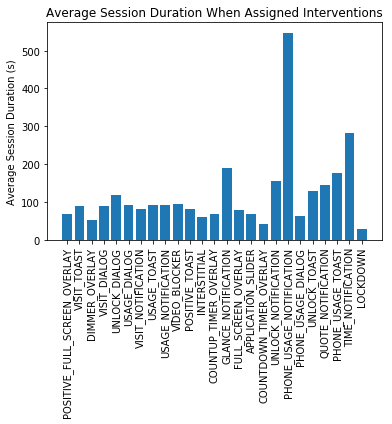

In [8]:

# Now let's analyze which interventions are most effective.
import matplotlib.pyplot as pyplot
interventions = {}
for account in accounts:
    for user in account["android"]:
        for session in db[user + "_sessions"].find({"enabled": True}):
            if "interventions" in session:
                for intervention in session["interventions"]:
                    intervention_name = intervention["intervention"]
                    if intervention_name not in interventions:
                        interventions[intervention_name] = {"total": 0, "count": 0}
                    interventions[intervention_name]["total"] += session["duration"]
                    interventions[intervention_name]["count"] += 1 
"""
"""
pyplot.figure(counter)
counter += 1
pyplot.title('Average Session Duration When Assigned Interventions')
pyplot.ylabel('Average Session Duration (s)')
pyplot.xticks(rotation=90)
pyplot.bar([name for name in interventions], [interventions[name]["total"]/interventions[name]["count"] for name in interventions])


In [9]:
# Let's get the distribution of session lengths (hopefully log-norm for LMM)
import matplotlib.pyplot as pyplot
counter = 45
import math
session_durations = []
for account in accounts:
    for user in account["android"]:
        for session in db[user + "_sessions"].find({"duration": {"$lt": 28800, "$gt": 0}, "enabled": {"$exists": True}}):
            interventions = []
            frequent = False
            if "frequent" in session:
                frequent = session["frequent"]
            enabled = session["enabled"]
            if "interventions" in session:
                interventions = session["interventions"]
            session_durations.append({"enabled": enabled, "frequent": frequent, "duration": session["duration"], "interventions": interventions, "user": user, "goal": session["domain"]})

from scipy.stats import shapiro
print(shapiro([session["duration"] for session in session_durations]))

(0.08575564622879028, 0.0)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,
         2.,  2.,  2.,  2.,  3.,  3.,  3.,  4.,  4.,  5.,  5.,  5.,  7.,
         7.,  7.,  9.,  9., 11., 12., 13., 14., 17., 18., 20.]),
 array([0.        , 0.1058661 , 0.21173219, 0.31759829, 0.42346439,
        0.52933048, 0.63519658, 0.74106268, 0.84692877, 0.95279487,
        1.05866096, 1.16452706, 1.27039316, 1.37625925, 1.48212535,
        1.58799145, 1.69385754, 1.79972364, 1.90558974, 2.01145583,
        2.11732193, 2.22318803, 2.32905412, 2.43492022, 2.54078632,
        2.64665241, 2.75251851, 2.85838461, 2.9642507 , 3.0701168 ,
        3.17598289, 3.28184899, 3.38771509, 3.49358118, 3.59944728,
        3.70531338, 3.81117947, 3.91704557, 4.02291167, 4.12877776,
        4.23464386, 4.34050996, 4.44637605, 4.55224215, 4.65810825,
        4.76397434, 4.86984044, 4.97570654, 5.08157263, 5.18743873,
        5.29330482]),
 <a list of 50

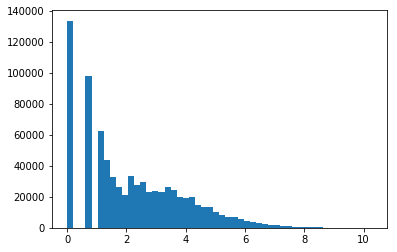

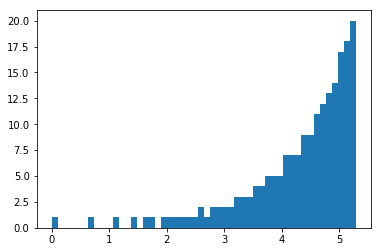

In [10]:
pyplot.figure(counter)
counter += 1
pyplot.hist([math.log(session["duration"]) for session in session_durations], bins=50)
pyplot.figure(counter)
counter += 1
pyplot.hist([math.log(num) for num in range(1,200)], bins = 50)

In [11]:
durations = [math.log(session["duration"]) for session in session_durations]
from scipy.stats import gamma, kstest 
params = gamma.fit(durations)
print(kstest(durations, 'gamma', params))

import scipy.stats as stats    
alpha = 5
loc = 100.5
beta = 22
data = stats.gamma.rvs(alpha, loc=loc, scale=beta, size=10000)    
transformed_data = [math.log(math.exp(d)) for d in data]
params3 = gamma.fit(data)
kstest(data, 'gamma', params3)

KstestResult(statistic=0.29472127025044675, pvalue=0.0)


KstestResult(statistic=0.0058403379325152605, pvalue=0.8846913200645838)

In [12]:
for account in accounts:
    for user in account["android"]:
        for session in db[user + "_sessions"].find({"duration": {"$lt": 0}}):
            print(user)
            print(session)

e91d2715bdf89bad899ace3b
{'_id': ObjectId('5b78758054852c0014e043ed'), 'timestamp': 1534621056412.0, 'duration': -16, 'enabled': False, 'frequent': False, 'domain': 'com.samsung.android.messaging', 'utcOffset': -240, 'interventions': [], 'isoWeek': 33, 'version': 39}
e91d2715bdf89bad899ace3b
{'_id': ObjectId('5b7875e354852c0014e0443c'), 'timestamp': 1534621155601.0, 'duration': -17, 'enabled': False, 'frequent': False, 'domain': 'com.sec.android.app.launcher', 'utcOffset': -240, 'interventions': [], 'isoWeek': 33, 'version': 39}
fb4522ebc44955dc0842a79d
{'_id': ObjectId('5b7eab5fe3498a0014240fcc'), 'timestamp': 1535028063563.0, 'duration': -1, 'enabled': False, 'frequent': False, 'domain': 'com.baidu.input', 'utcOffset': 480, 'interventions': [], 'isoWeek': 34, 'version': 34}
8558df6088d619d2391bca10
{'_id': ObjectId('5b7ee646e3498a0014248e91'), 'timestamp': 1535043142561.0, 'duration': -4, 'enabled': False, 'target': False, 'frequent': False, 'domain': 'com.sec.android.app.launcher', 

In [13]:
#Ehh.... our Shapiro test didn't fare too well, but we'll export to a CSV and let Geza run an LMM anyway.
import csv
with open('sessions_for_intervention.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['frequent', 'duration (log(s))', 'interventions', 'user', 'goal'])
    for session in session_durations:
        writer.writerow([session[name] for name in session])

In [14]:
# Now, let's see which version is responsible for the super low sessions (it was a bug)
version_counts = {}
for account in accounts:
    for user in account["android"]:
        for session in db[user + "_sessions"].find({"enabled": True, "version": {"$exists": True}}):
            version = session["version"]
            if version not in version_counts:
                version_counts[version] = {"small": 0, "all": 0}
            version_counts[version]["all"] += 1
            if session["duration"] < 1:
                version_counts[version]["small"] += 1
print([str(version) + ":" + str(version_counts[version]["small"]/version_counts[version]["all"]) + " " for version in version_counts])


['21:0.023616734143049933 ', '24:0.017957351290684626 ', '18:0.005291005291005291 ', '20:0.021695257315842584 ', '27:0.10934182590233546 ', '28:0.046024386055297954 ', '32:0.07769195820081781 ', '33:0.06004319654427646 ', '34:0.06881982240045832 ', '37:0.05663131263987545 ', '38:0.058027541192390356 ', '39:0.058311049771413784 ', '25:0.03567984570877531 ', '41:0.05437619627631808 ', '43:0.04444869587398763 ', '46:0.04179294163652361 ', '48:0.06373129133310129 ', '29:0.19143719351188232 ', '23:0.041666666666666664 ', '31:0.270935960591133 ', '42:0.05740740740740741 ', '44:0.008849557522123894 ', '26:0.16176470588235295 ', '40:0.03873239436619718 ', '35:0.0 ']


In [15]:
# Now, let's do some clean up.
# ABORT: VERY FEW HABITLAB SESSIONS First, we should remove 0-length sessions. They really shouldn't happen.
# Next, we should also remove sessions that are longer than a day. That was because of a bug in my code.



In [16]:
# Find number of users who didn't make it past onboarding.
num_users = 0
num_quit_users = 0
collections = db.list_collection_names()
for account in accounts:
    for user in account["android"]:
        num_users += 1
        if user+"_sessions" not in collections:
            num_quit_users += 1
print("Total Android users: " + str(num_users))
print("Android users who didn't make it past onboarding: " + str(num_quit_users))
print("% of quitters: " + str(num_quit_users/num_users))

Total Android users: 798
Android users who didn't make it past onboarding: 167
% of quitters: 0.20927318295739347


In [17]:
import pandas
from statistics import mean
# Analyze conservation within Android
total_sessions_per_day = 0
count_sessions_per_day = 0
for account in accounts:
    for user in account["android"]:
        sessions_per_day = {}
        for session in db[user + "_sessions"].find():
            ts = pandas.Timestamp(ts_input=session["timestamp"], unit="ms")
            day = str(ts.year) + str(ts.month) + str(ts.day)
            if day not in sessions_per_day:
                sessions_per_day[day] = 0
            sessions_per_day[day] += 1
        arr = [sessions_per_day[day] for day in sessions_per_day]
        if (len(arr) > 0):
            total_sessions_per_day += mean(arr)
            count_sessions_per_day += 1
print(str(total_sessions_per_day/count_sessions_per_day))
        
        

214.16163231945524


In [18]:
ANDROID = "android"
BROWSER = "browser"
SHARED = "shared"
SPEND_LESS_TIME_LENGTH = len("custom/spend_less_time_")
# Associate users with domain name which will function as our key.
def get_name(name, device):
    """
    @param name: goal name (package name for Android)
    @param device: "android" or "browser"
    @return name of goal with subdomains removed and goal annotation removed (i.e. spend_less_time)
    """
    name = name.lower()
    if device == ANDROID: 
        subs = list(filter(lambda x: x != "android" and x != "google", name.split('.')))
        if len(subs) < 2:
            return subs[0]
        return subs[1]
    # must be custom browser goal
    if "custom" in name:
        name = name[SPEND_LESS_TIME_LENGTH:]
        subs = name.split('.')
        if len(subs) < 2:
            return subs[0]
        return subs[len(subs) - 2]
    # Must be normal browser goal
    return name.split('/spend')[0]
        
    
def organize_stats(shared_goals, stats, device):
    """
    Organizes that stats object into shared_goals for device.
    @param shared_goals: dictionary
    @param stats:  stats object returned from freq_stats
    @param device: ANDROID or BROWSER
    """
    for iso in stats:
        for freq in stats[iso]:
            for goal in stats[iso][freq]:
                name = get_name(goal, device)
                if name not in shared_goals:
                    shared_goals[name] = {ANDROID: {}, BROWSER: {}}
                shared_goals[name][device][goal] = freq
                if len(shared_goals[name][ANDROID]) > 0 and len(shared_goals[name][BROWSER]) > 0:
                    shared_goals[SHARED].append(name)

"""
Unit Tests:
print(get_name("custom/spend_less_time_gizmodo.com", BROWSER))
print(get_name("facebook/spend_less_time", BROWSER))
print(get_name("com.duolingo", ANDROID))
print(get_name("com.android.chrome", ANDROID))
"""


'\nUnit Tests:\nprint(get_name("custom/spend_less_time_gizmodo.com", BROWSER))\nprint(get_name("facebook/spend_less_time", BROWSER))\nprint(get_name("com.duolingo", ANDROID))\nprint(get_name("com.android.chrome", ANDROID))\n'

SyntaxError: unexpected EOF while parsing (<ipython-input-19-3852e197d321>, line 15)

In [ ]:
# Let's find the ten most active users!!
ten_most_active_users = []
for account in accounts:
    for user in account["android"]:
        num_sessions = len([s for s in db[user + "_sessions"].find()])
        if len(ten_most_active_users) < 100 or ten_most_active_users[0]["sessions"] < num_sessions:
            user_obj = {"user": user, "sessions": num_sessions}
            print(user_obj)
            if (len(ten_most_active_users) < 100):
                ten_most_active_users.append(user_obj)
            else:
                ten_most_active_users[0] = user_obj
                ten_most_active_users = sorted(ten_most_active_users, key=lambda user: user["sessions"])

In [ ]:
def generate_goal_data(user):
    """
    Generates goal data (frequency settings for each iso week) for the user
    :return {domain: {total_time: Number,  "freq": Set(iso),  "infreq": Set(iso)}}
    """
    goals = {}
    for session in db[user + "_sessions"].find({"enabled": True, "frequent": {"$exists": True}, "isoWeek": {"$exists": True}}):
        domain = session["domain"]
        if domain not in goals:
            goals[domain] = {"freq": set([]), "infreq": set([]), "total_time": 0}
        goals[domain]["total_time"] += session["duration"]
        goals[domain]["freq" if session["frequent"] else "infreq"].add(session["isoWeek"])
    return goals
    

In [ ]:
print(ten_most_active_users)

In [ ]:
user_goal_data = {}
for user_obj in ten_most_active_users:
    user = user_obj["user"]
    user_goal_data[user] = generate_goal_data(user)
print(user_goal_data)

In [ ]:
from statistics import mean
import moment
def count_freq_time_for_week(user, app, weeks):
    """
    Calculates average time spent per day on an app for iso weeks of a certain frequency setting vs. others.
    :param user user id
    :param weeks set of iso weeks for this frequency setting
    :app package name of app of interest
    :return (avg_time_spent_app_day, avg_time_spent_others_day)
    """
    time_app = []
    time_others = []
    for iso in weeks:
        app_time = 0
        other_time = 0
        prev_day = ""
        for session in db[user + "_sessions"].find({"isoWeek": iso, "duration":{"$lt": 86400}}):
            day = moment.unix(session["timestamp"]).format("YYYY-MM-DD")
            if prev_day != day:
                if prev_day != "": # skip first day
                    time_app.append(app_time)
                    time_others.append(other_time)
                    app_time = 0
                    other_time = 0
                prev_day = day
            if session["domain"] == goal:
                app_time += session["duration"]
            else:
                other_time += session["duration"] 
        # skip last day: time_app.append(app_time)
        # skip last day: time_others.append(other_time)
    return (mean(time_app), mean(time_others))

    

In [ ]:
from statistics import StatisticsError
num_alternates = 0
num_freq_lower = 0
num_freq_others_higher = 0
change_freq = []
change_others = []
for user in user_goal_data:
    # find most active app that switched from freq to infreq
    goal_data = user_goal_data[user]
    most_active_site = ""
    most_active_time = 0
    for goal in goal_data:
        alternates = goal != "biggest_domain" and len(goal_data[goal]["freq"]) > 0 and len(goal_data[goal]["infreq"]) > 0
        if alternates:
            print(goal_data[goal])
            # Let's compare time spent on other apps to time spent on your app.
            try:
                (freq_app, freq_others) = count_freq_time_for_week(user, goal, goal_data[goal]["freq"])
                (infreq_app, infreq_others) = count_freq_time_for_week(user, goal, goal_data[goal]["infreq"])
                print("FOR GOAL: " + goal)
                print("FREQ APP TIME: " + str(freq_app) + " FREQ OTHER TIME: " + str(freq_others))
                print("INFREQ APP TIME: "  + str(infreq_app) + " INFREQ OTHER TIME: " + str(infreq_others))
                change_freq.append(freq_app - infreq_app)
                change_others.append(freq_others - infreq_others)
                if (freq_app < infreq_app):
                    num_freq_lower += 1
                if freq_others > infreq_others:
                    num_freq_others_higher += 1
                num_alternates += 1
                print("\n\n")
            except StatisticsError:
                # Do nothing
                continue
                    
        

In [ ]:
from statistics import median
print("Num alternating goals:" + str(num_alternates))
print("Num w/ freq avg lower than infreq avg: " + str(num_freq_lower) +" " + str(num_freq_lower/num_alternates))
print("Num w/ freq others greater than infreq others: " + str(num_freq_others_higher) + " " + str(num_freq_others_higher/num_alternates))
print("avg app difference (should be negative): " + str(median(change_freq)))
print("avg other difference (should be positive): " + str(median(change_others)))

In [46]:
# now, write GLMM for the effect of popular goals on total time spent on phone for the day.
# For each user, we we will have an object with their settings (like a cache)
PACKAGES = "packages"
def get_freq_for_app(user, iso, package, freq_stats):
    """
    Get's frequency setting for app.
    :param user user id
    :param iso iso week
    :param package app package name
    :param freq_stats cache -> {user: {package: isoweek: freq}}
    :return "freq" or "infreq"
    """
    # not in cache yet. We'll have to search for it.
    if user not in freq_stats:
        freq_stats[user] = {}
        stats = json.loads(req.urlopen("http://localhost:5000/freq_stats_for_user?id="+user).read().decode("utf-8"))
        for iso in stats:
            for freq in stats[iso]:
                for package in stats[iso][freq]:
                    if package not in freq_stats[user]:
                        freq_stats[user][package] = {}
                    if iso not in freq_stats[user][package]:
                        freq_stats[user][package][iso] = freq
    if package in freq_stats[user] and iso in freq_stats[user][package]:
        return freq_stats[user][package][iso]
    return "N/A" # No stats for that package.
        

In [47]:
# Now, see whether you can make an effective goal.
TIME = "time"
freq_stats = {} 
COMMON_GOALS = ['facebook', 'gmail', 'youtube', 'netflix', 'chrome']
goal_data = []
print("huh??")
import moment
from datetime import date, datetime
for account in accounts:
    usage_stats = {}
    for user in account[ANDROID]:
        for session in db[user + "_sessions"].find({"duration": {"$lt": 86400}}):
            time = moment.unix(session["timestamp"])
            day = time.format("YYYY-MM-DD")
            iso = str(datetime.fromtimestamp(session["timestamp"]/1000).isocalendar()[1]) 
            if day not in usage_stats:
                usage_stats[day] = {}
            name = get_name(session["domain"], ANDROID)
            if name not in COMMON_GOALS:
                name = "other"
            if name not in usage_stats[day]:
                # TODO: Handle other frequency settings.
                freq = get_freq_for_app(user, iso, session["domain"], freq_stats)
                usage_stats[day][name] = {"frequency": freq, TIME: 0}
            if session["duration"] > 0:
                usage_stats[day][name][TIME] += math.log(session["duration"])
    for day in usage_stats:
        day_obj = {}
        for name in usage_stats[day]:
            if name == "other":
                day_obj[TIME] = usage_stats[day][name][TIME]
            else:    
                day_obj[name + "_frequency"] = usage_stats[day][name]["frequency"]
            goal_data.append(day_obj)

huh??


In [48]:
print(goal_data)

[{'time': 48.3397470365315, 'chrome_frequency': 'N/A'}, {'time': 48.3397470365315, 'chrome_frequency': 'N/A'}, {'time': 11.207893754183337, 'chrome_frequency': 'N/A'}, {'time': 11.207893754183337, 'chrome_frequency': 'N/A'}, {'chrome_frequency': 'N/A', 'time': 179.89609383814812}, {'chrome_frequency': 'N/A', 'time': 179.89609383814812}, {'time': 31.39191068755713, 'chrome_frequency': 'infreq'}, {'time': 31.39191068755713, 'chrome_frequency': 'infreq'}, {'time': 182.665498246427, 'chrome_frequency': 'infreq'}, {'time': 182.665498246427, 'chrome_frequency': 'infreq'}, {'time': 145.97352432078745, 'chrome_frequency': 'infreq'}, {'time': 145.97352432078745, 'chrome_frequency': 'infreq'}, {'time': 229.37881776465898, 'chrome_frequency': 'infreq'}, {'time': 229.37881776465898, 'chrome_frequency': 'infreq'}, {'time': 111.33273713209718, 'chrome_frequency': 'infreq'}, {'time': 111.33273713209718, 'chrome_frequency': 'infreq'}, {'time': 0.0}, {'time': 1.6094379124341003}, {'time': 65.3573613858